
# Essai de parametrisation sigmoid




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib import interactive
import math
%matplotlib notebook

In [5]:
def sigmoid(t,a,b,c,d=None):
    """ return the value of sigmoid for t """
    # t, time
    # a,b,c,d sigmoid parameters
    if d==None:
        d=0.
    return a+(d-a)/(1.+math.exp(-b*(t-c)))

def sigabcd(t,a,b,c,d):
    return np.array([sigmoid(ti,a,b,c,d) for ti in t])

def fap(t,kap,tp,sp,tm,sm):
    return kap*(1.-sigmoid(t,1.,sp,tp,0.))*sigmoid(t,1.,sm,tm,0.)

def fapt(t,kap,tp,sp,tm,sm):
    return np.array([fap(ti,kap,tp,sp,tm,sm) for ti in t])

In [6]:
Tmax=20
Tmin=10
t = np.arange(Tmin, Tmax, 1)
kap=10.
tp=12.
sp=1
tm=16.
sm=1
s = fapt(t,kap,tp,sp,tm,sm)
print [sigmoid(1.,sp,tp,0.)]
print max(s)
print s
plt.plot(t,s)
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-dd99d1647f47>, line 11)

<IPython.core.display.Javascript object>


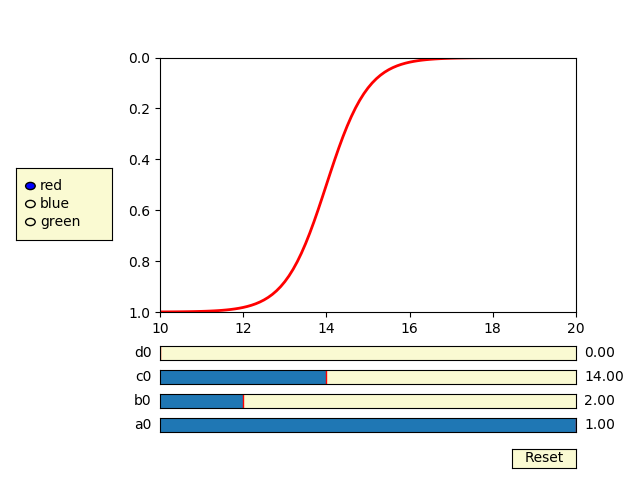

In [7]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
Tmax=20
Tmin=10
t = np.arange(Tmin, Tmax, 0.1)
a0 = 1.
d0 = 0.
c0= 14.
b0=2.
(a,b,c,d)=(a0,b0,c0,d0)
s = sigabcd(t,a0,b0,c0,d0)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([Tmin, Tmax, a0, d0])

axcolor = 'lightgoldenrodyellow'
axa0 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axb0 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axc0 = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
axd0 = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)

sa0 = Slider(axa0, 'a0', 0., 1., valinit=a0)
sb0 = Slider(axb0, 'b0', 0., 10.0, valinit=b0)
sc0 = Slider(axc0, 'c0', 10., 20.0, valinit=c0)
sd0 = Slider(axd0, 'd0', 0., 1., valinit=d0)

def update(val):
    a = sa0.val
    b = sb0.val
    c = sc0.val
    d = sd0.val
    l.set_ydata(sigabcd(t,a,b,c,d))
    fig.canvas.draw_idle()
sa0.on_changed(update)
sb0.on_changed(update)
sd0.on_changed(update)
sc0.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sa0.reset()
    sb0.reset()
    sc0.reset()
    sd0.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)
plt.show()